# Installation

it will take some minutes to install GMT in colab

In [1]:
import sys
if 'google.colab' in sys.modules:
    !sudo apt update 
    !sudo apt upgrade -y
    !sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
    # clone gmt from source
    !git clone --depth 50 https://github.com/GenericMappingTools/gmt
    # cmake everything
    !cmake /content/gmt
    # build and install
    !cmake --build . --target install

    !pip install pygmt geopandas geopandas openpyxl obspy ipykernel
    !git clone https://github.com/ecastillot/EQViewer.git /content/EQViewer

**Please restart your kernel**. And then, enjoy the following

In [2]:
import sys
import os
if 'google.colab' in sys.modules:
    repository_path = r"/content/EQViewer"  
else:
    repository_path = r"/home/emmanuel/EQViewer"  ##change this path where is located the main directory

sys.path.insert(0,repository_path)
rep_data = os.path.join(repository_path,"data")
rep_out = os.path.join(repository_path,"docs","figures")

# Well

In this notebook, you will see some examples to manipulate the Well object. You also will learn how to use it to plot it in your map.

In [3]:
import pandas as pd
from EQViewer.eqviewer import Well,BasePlot,CPT

Well object receives a dataframe as input. We are going to load one **synthetic well** saved in the [well_1.csv](https://github.com/ecastillot/EQViewer/blob/master/data/wells/survey/well_1.csv)

In [4]:
wellpath = os.path.join(rep_data,"wells","survey","well_1.csv")
df = pd.read_csv(wellpath)
df

,latitude,longitude,depth,TVD,MD
0,38.830000,-122.830000,-78.708504,0.000000,0
1,38.830005,-122.830004,-40.608504,1050.999659,1051
2,38.830004,-122.830002,-11.652504,1175.999013,1176
3,38.829999,-122.829996,17.300448,1270.995527,1271
4,38.829995,-122.829989,46.253400,1365.990612,1366
...,...,...,...,...,...
87,38.833708,-122.843787,1971.044064,7708.056160,8179
88,38.833854,-122.844366,1991.368128,7775.913325,8274
89,38.834048,-122.844955,2011.033824,7842.588818,8370
90,38.834288,-122.845533,2016.169704,7907.110872,8465


You can define how do you want to plot the Well object in your map. Take in mind the next tips:

 - BasePlot helps us with this task, it receives [pygmt.plot](https://www.pygmt.org/latest/api/generated/pygmt.Figure.plot.html) parameters, the only difference is in the size parameter. BasePlot receives it as lambda function to transform the size. Take a look in the  [Example No.3: With colobar and diferent size of 3_catalog.ipynb.](https://github.com/ecastillot/EQviewer/blob/master/examples/3_catalog.ipynb)

When we print the Well object, it shows where starts the well.

In [5]:
well_baseplot = BasePlot(color = None,
                    style=None,
                    cmap = False,
                    pen = "1p,blue",
                    label="well_survey")
well = Well(data=df,name="well_1",baseplot=well_baseplot)
print(well)

Well | starting in (lon,lat): (-122.83, 38.83) 


Or you can print more detail information.

In [6]:
print(well.__str__(True))

Well | starting in (lon,lat): (-122.83, 38.83) 
	depth : [-78.71, 2028.38]
	region: [-122.85, -122.83, 38.82, 38.84]


Plot your Well object in a map.

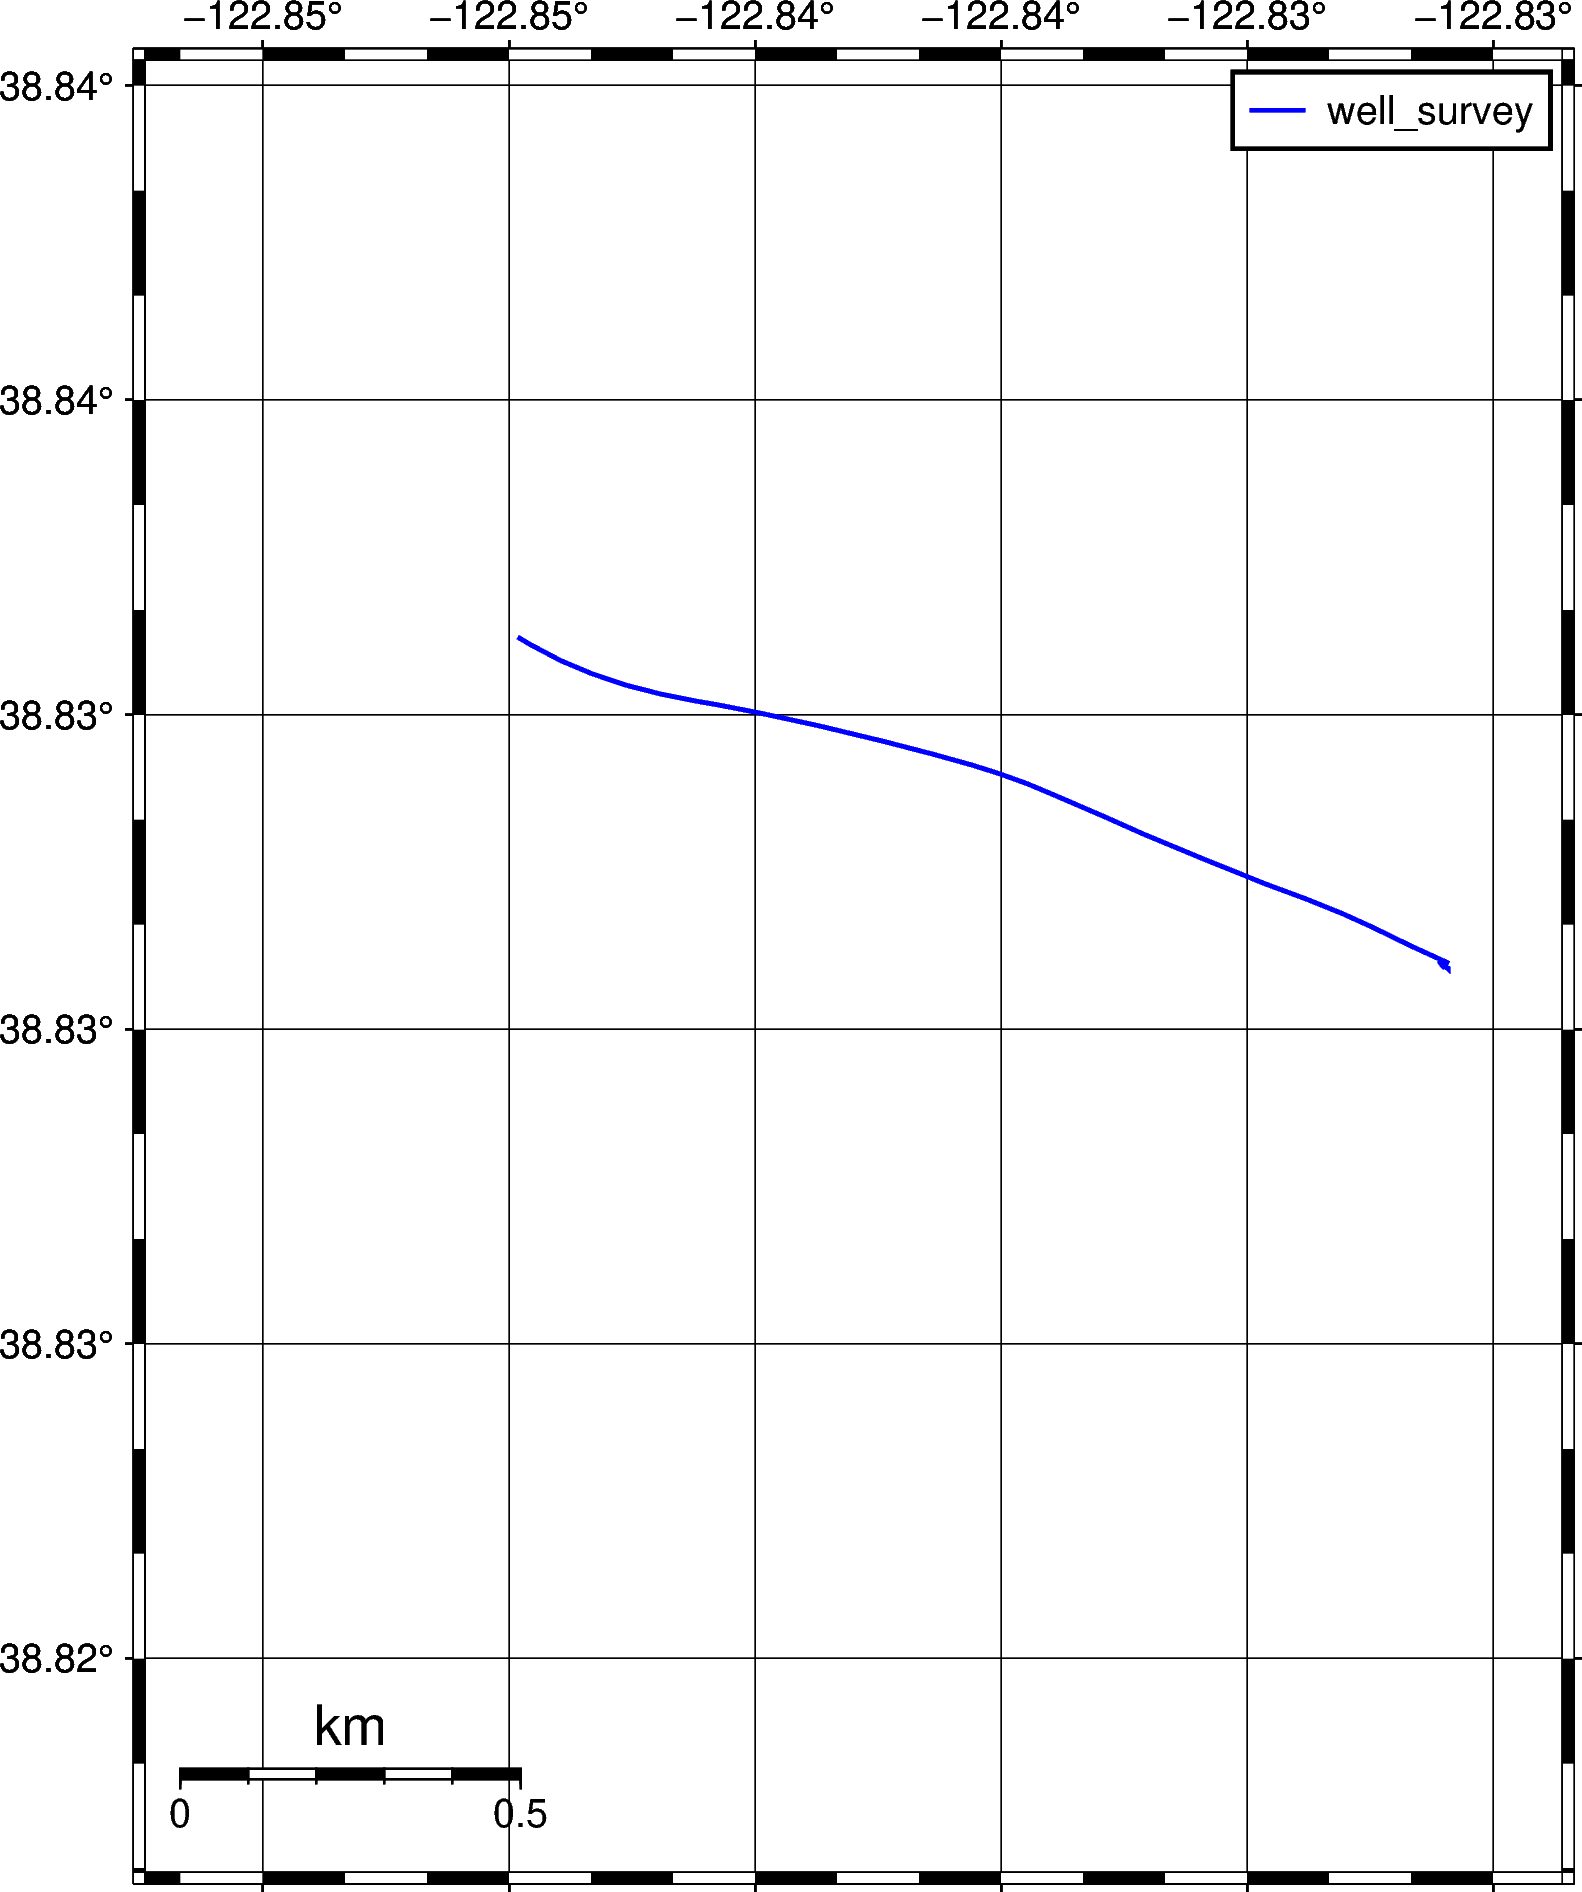

In [7]:
fig = well.plot_map()
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{0.5}k+f+lkm+at")
fig.legend(position=f"jTR+o0.1c",box='+gwhite+p1p')
fig.show()

## Example No.1: With continuos colorbar

CPT object allow as define how would be the colorbar. You have to specify color_target and label paramaters, the other parameters are taken from [pygmt.makecpt](https://www.pygmt.org/latest/api/generated/pygmt.makecpt.html).

plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.


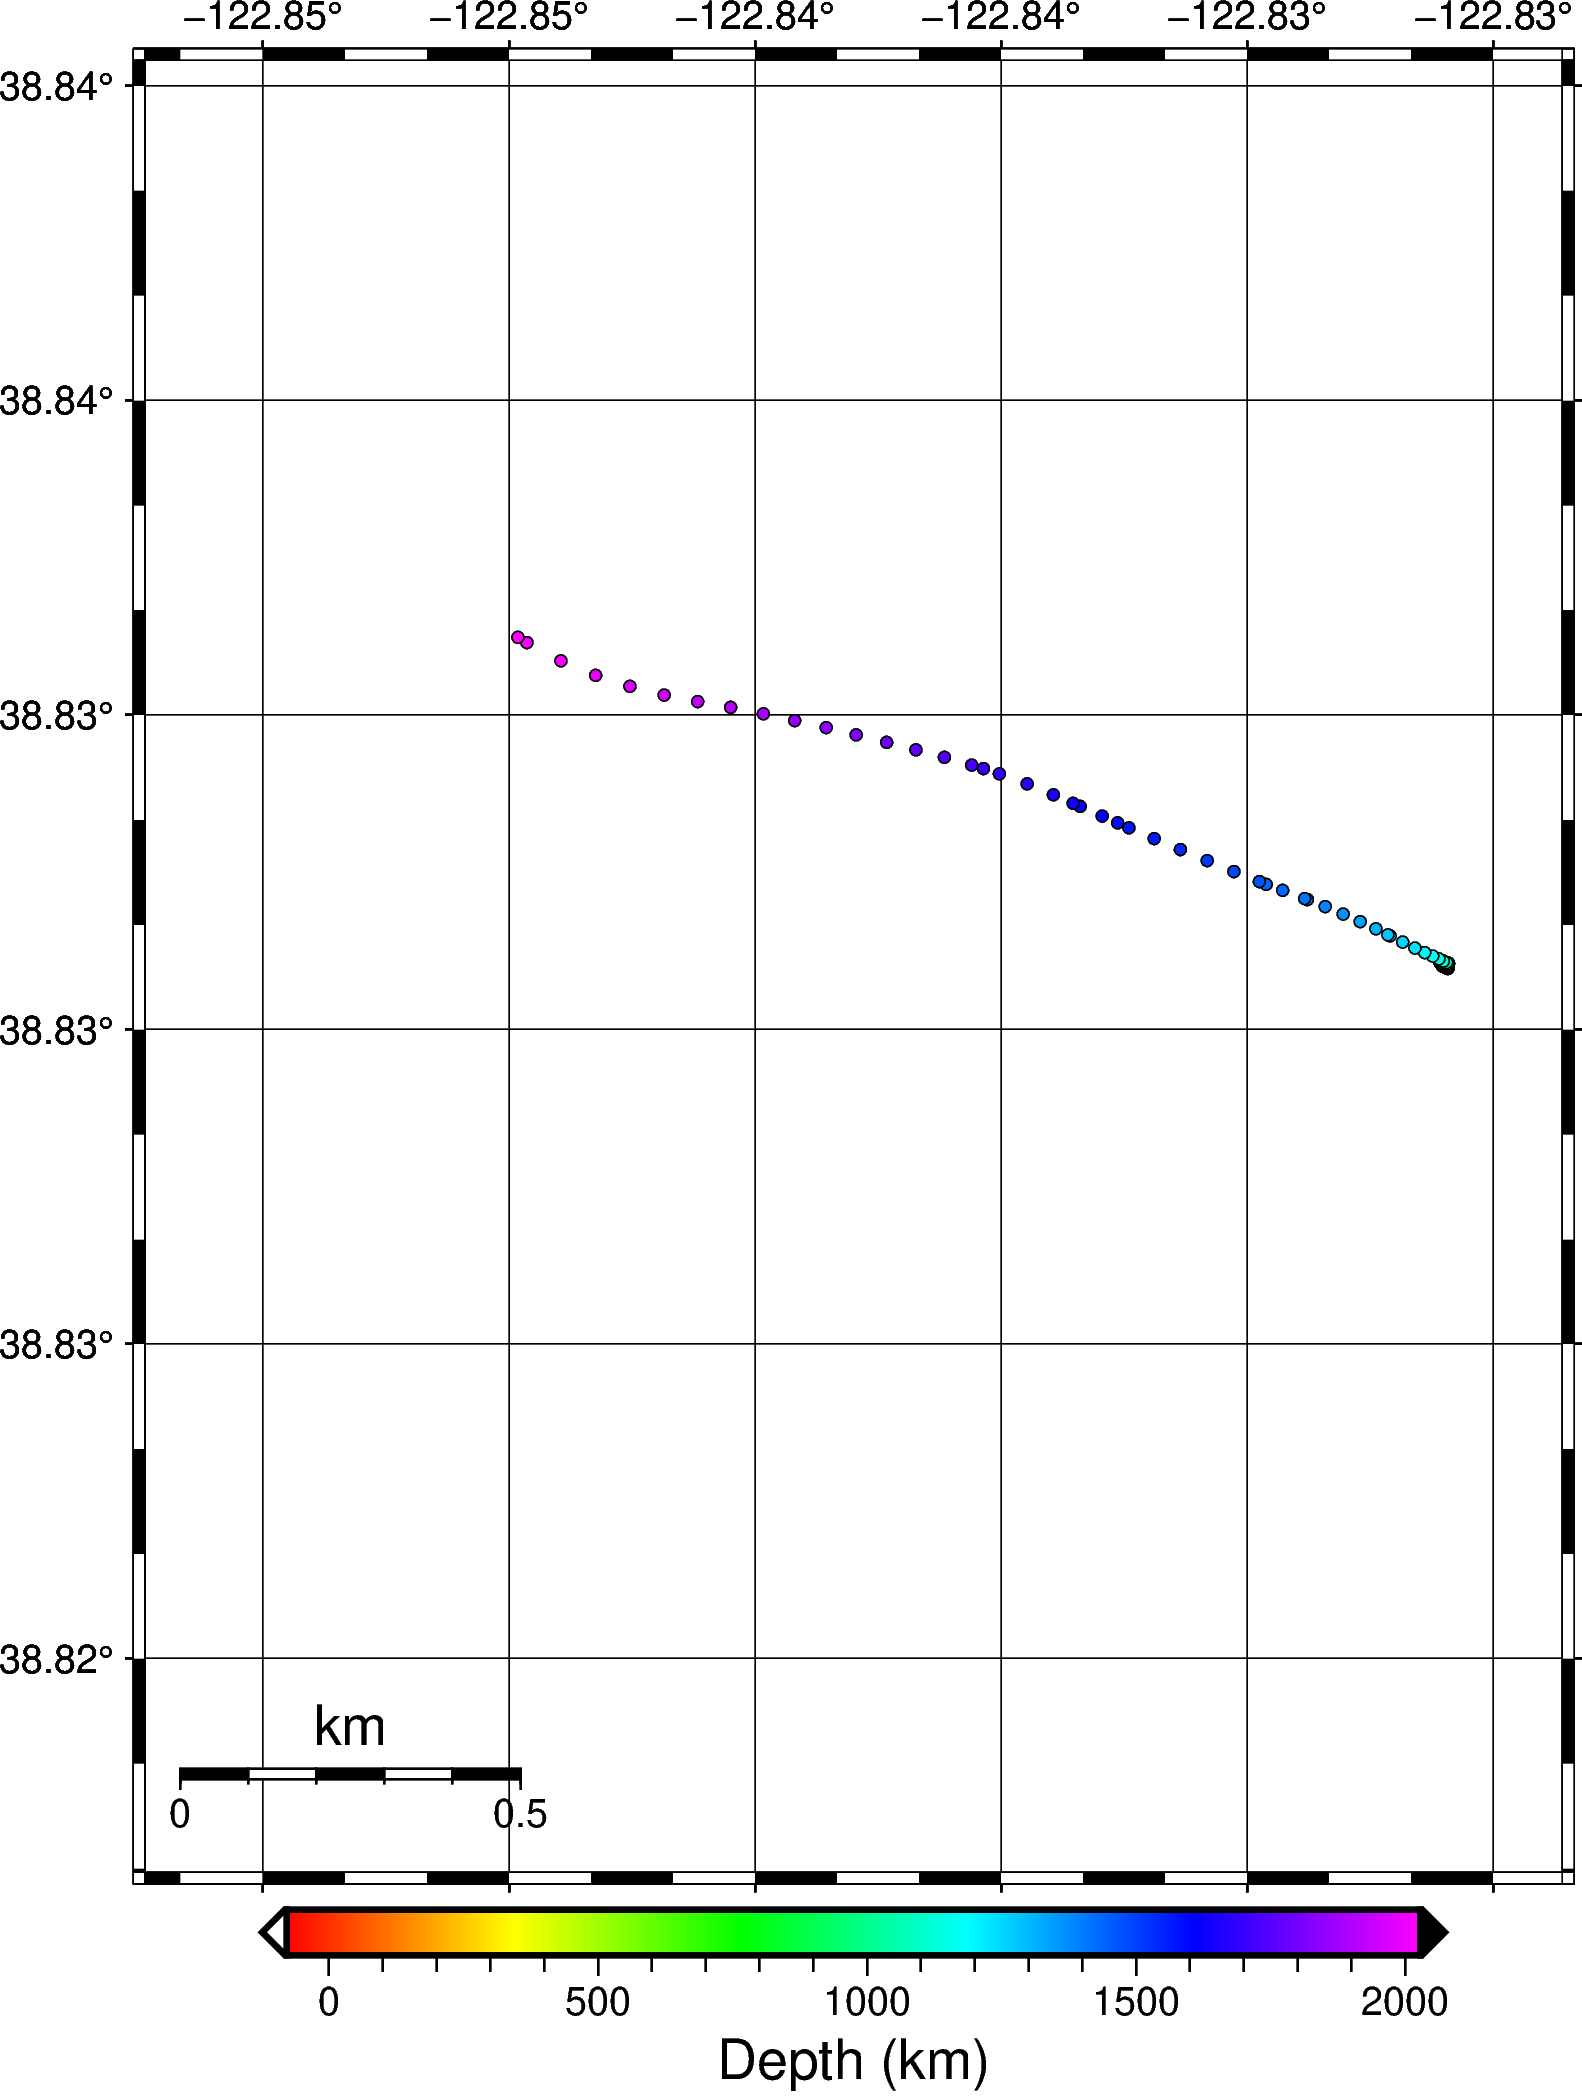

In [13]:
other_well_baseplot = BasePlot(color = "gray",
                    style="c0.1c",
                    size=None,
                    cmap = True,
                    pen = "black",
                    label="well_survey")
other_well = Well(data=df,name="well_1",baseplot=other_well_baseplot)

well_cpt = CPT(color_target="depth",
                label="Depth (km)",
                cmap="rainbow",
                series=[other_well.data.depth.min(),
                        other_well.data.depth.max()],
                reverse=True,
                overrule_bg=True)


fig = other_well.plot_map(survey_cpt=well_cpt,show_survey_cpt=True)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{0.5}k+f+lkm+at")
fig.show()

## Example No.2: With Injection

If you want to plot the injection location, you also could do. Take a look in this example.

Injection object receives a dataframe with injection depths. We are going to load synthetic depths of injection saved in [injection.csv](https://github.com/ecastillot/EQViewer/blob/master/data/wells/injection/injection.csv)

In [14]:
injectionpath = os.path.join(rep_data,"wells","injection","injection.csv")
inj_df = pd.read_csv(injectionpath)
inj_df

,min_depth,max_depth,measurement
0,7010,7200,1276.9
1,7220,7420,3000.0
2,7500,7650,1276.9


depth_type could be TVD,MD,depth. Where depth is the depth taken from the sea level.

In [15]:
from EQViewer import Injection
inj_baseplot=BasePlot(color="blue",
                    pen="5p,blue",
                    cmap=False)

inj = Injection(data=inj_df,depth_type="TVD",
                    baseplot=inj_baseplot)
print(inj)

Well object also receives the injection object

In [20]:
well_baseplot = BasePlot(color = None,
                    style=None,
                    cmap = False,
                    pen = "1.5p,black",
                    label="well_survey")
well_with_inj = Well(data=df,name="well_1",baseplot=well_baseplot,injection=inj)
print(well_with_inj.__str__(True))

Well | starting in (lon,lat): (-122.83, 38.83) 
	depth : [-78.71, 2028.38]
	region: [-122.85, -122.83, 38.82, 38.84]


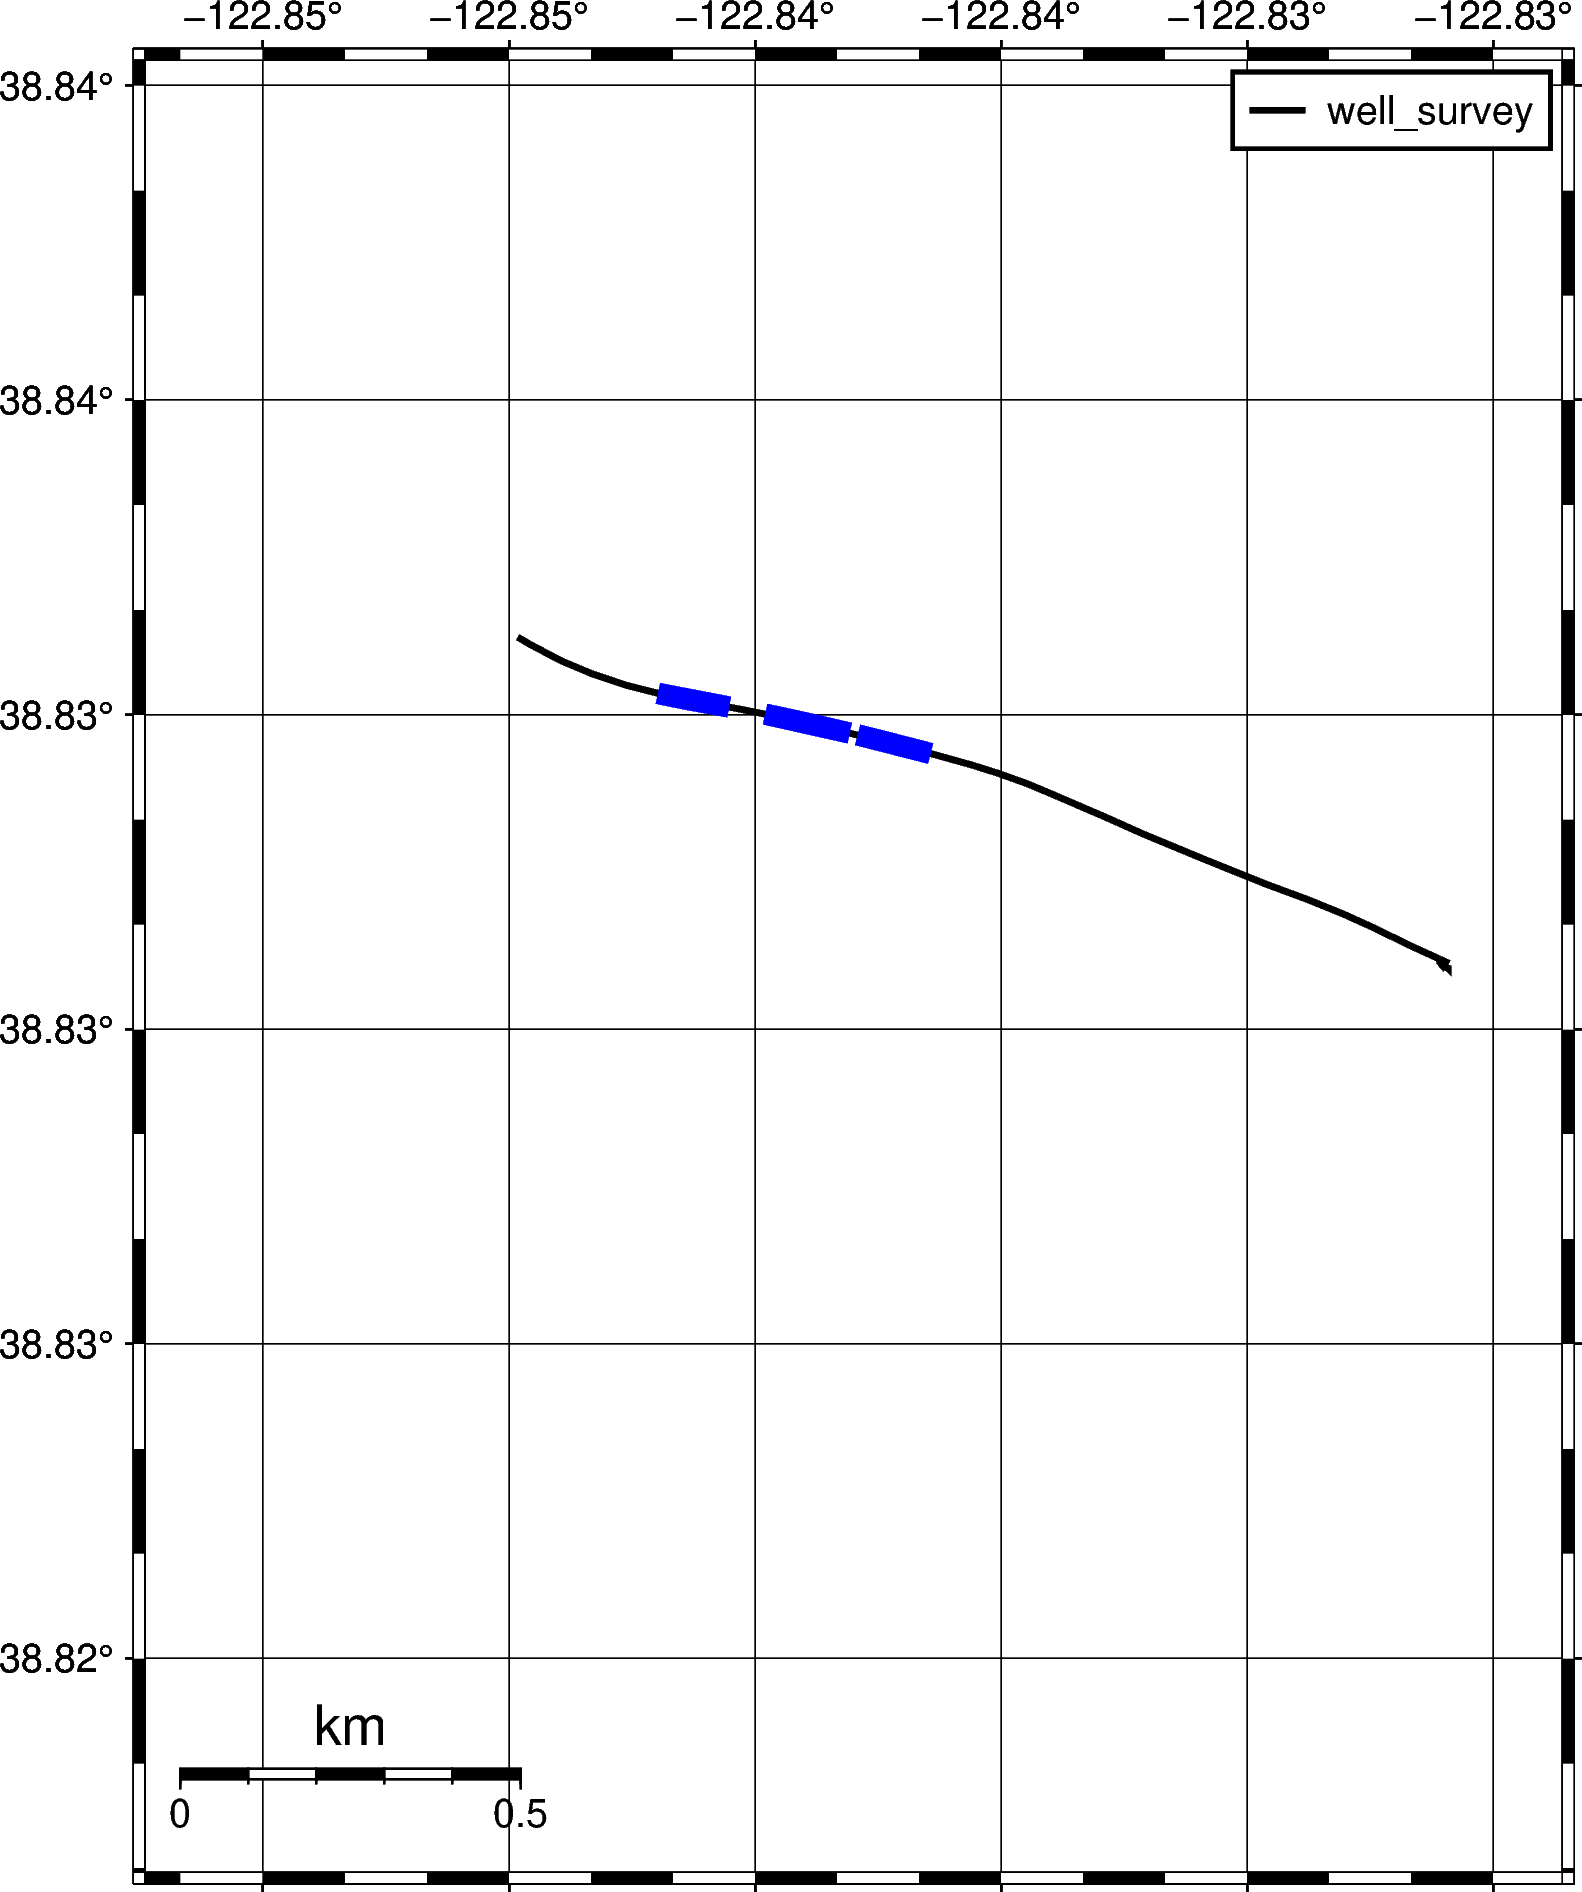

In [21]:
fig = well_with_inj.plot_map()
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{0.5}k+f+lkm+at")
fig.legend(position=f"jTR+o0.1c",box='+gwhite+p1p')
fig.show()

## Example No.3: With Injection and colorbar

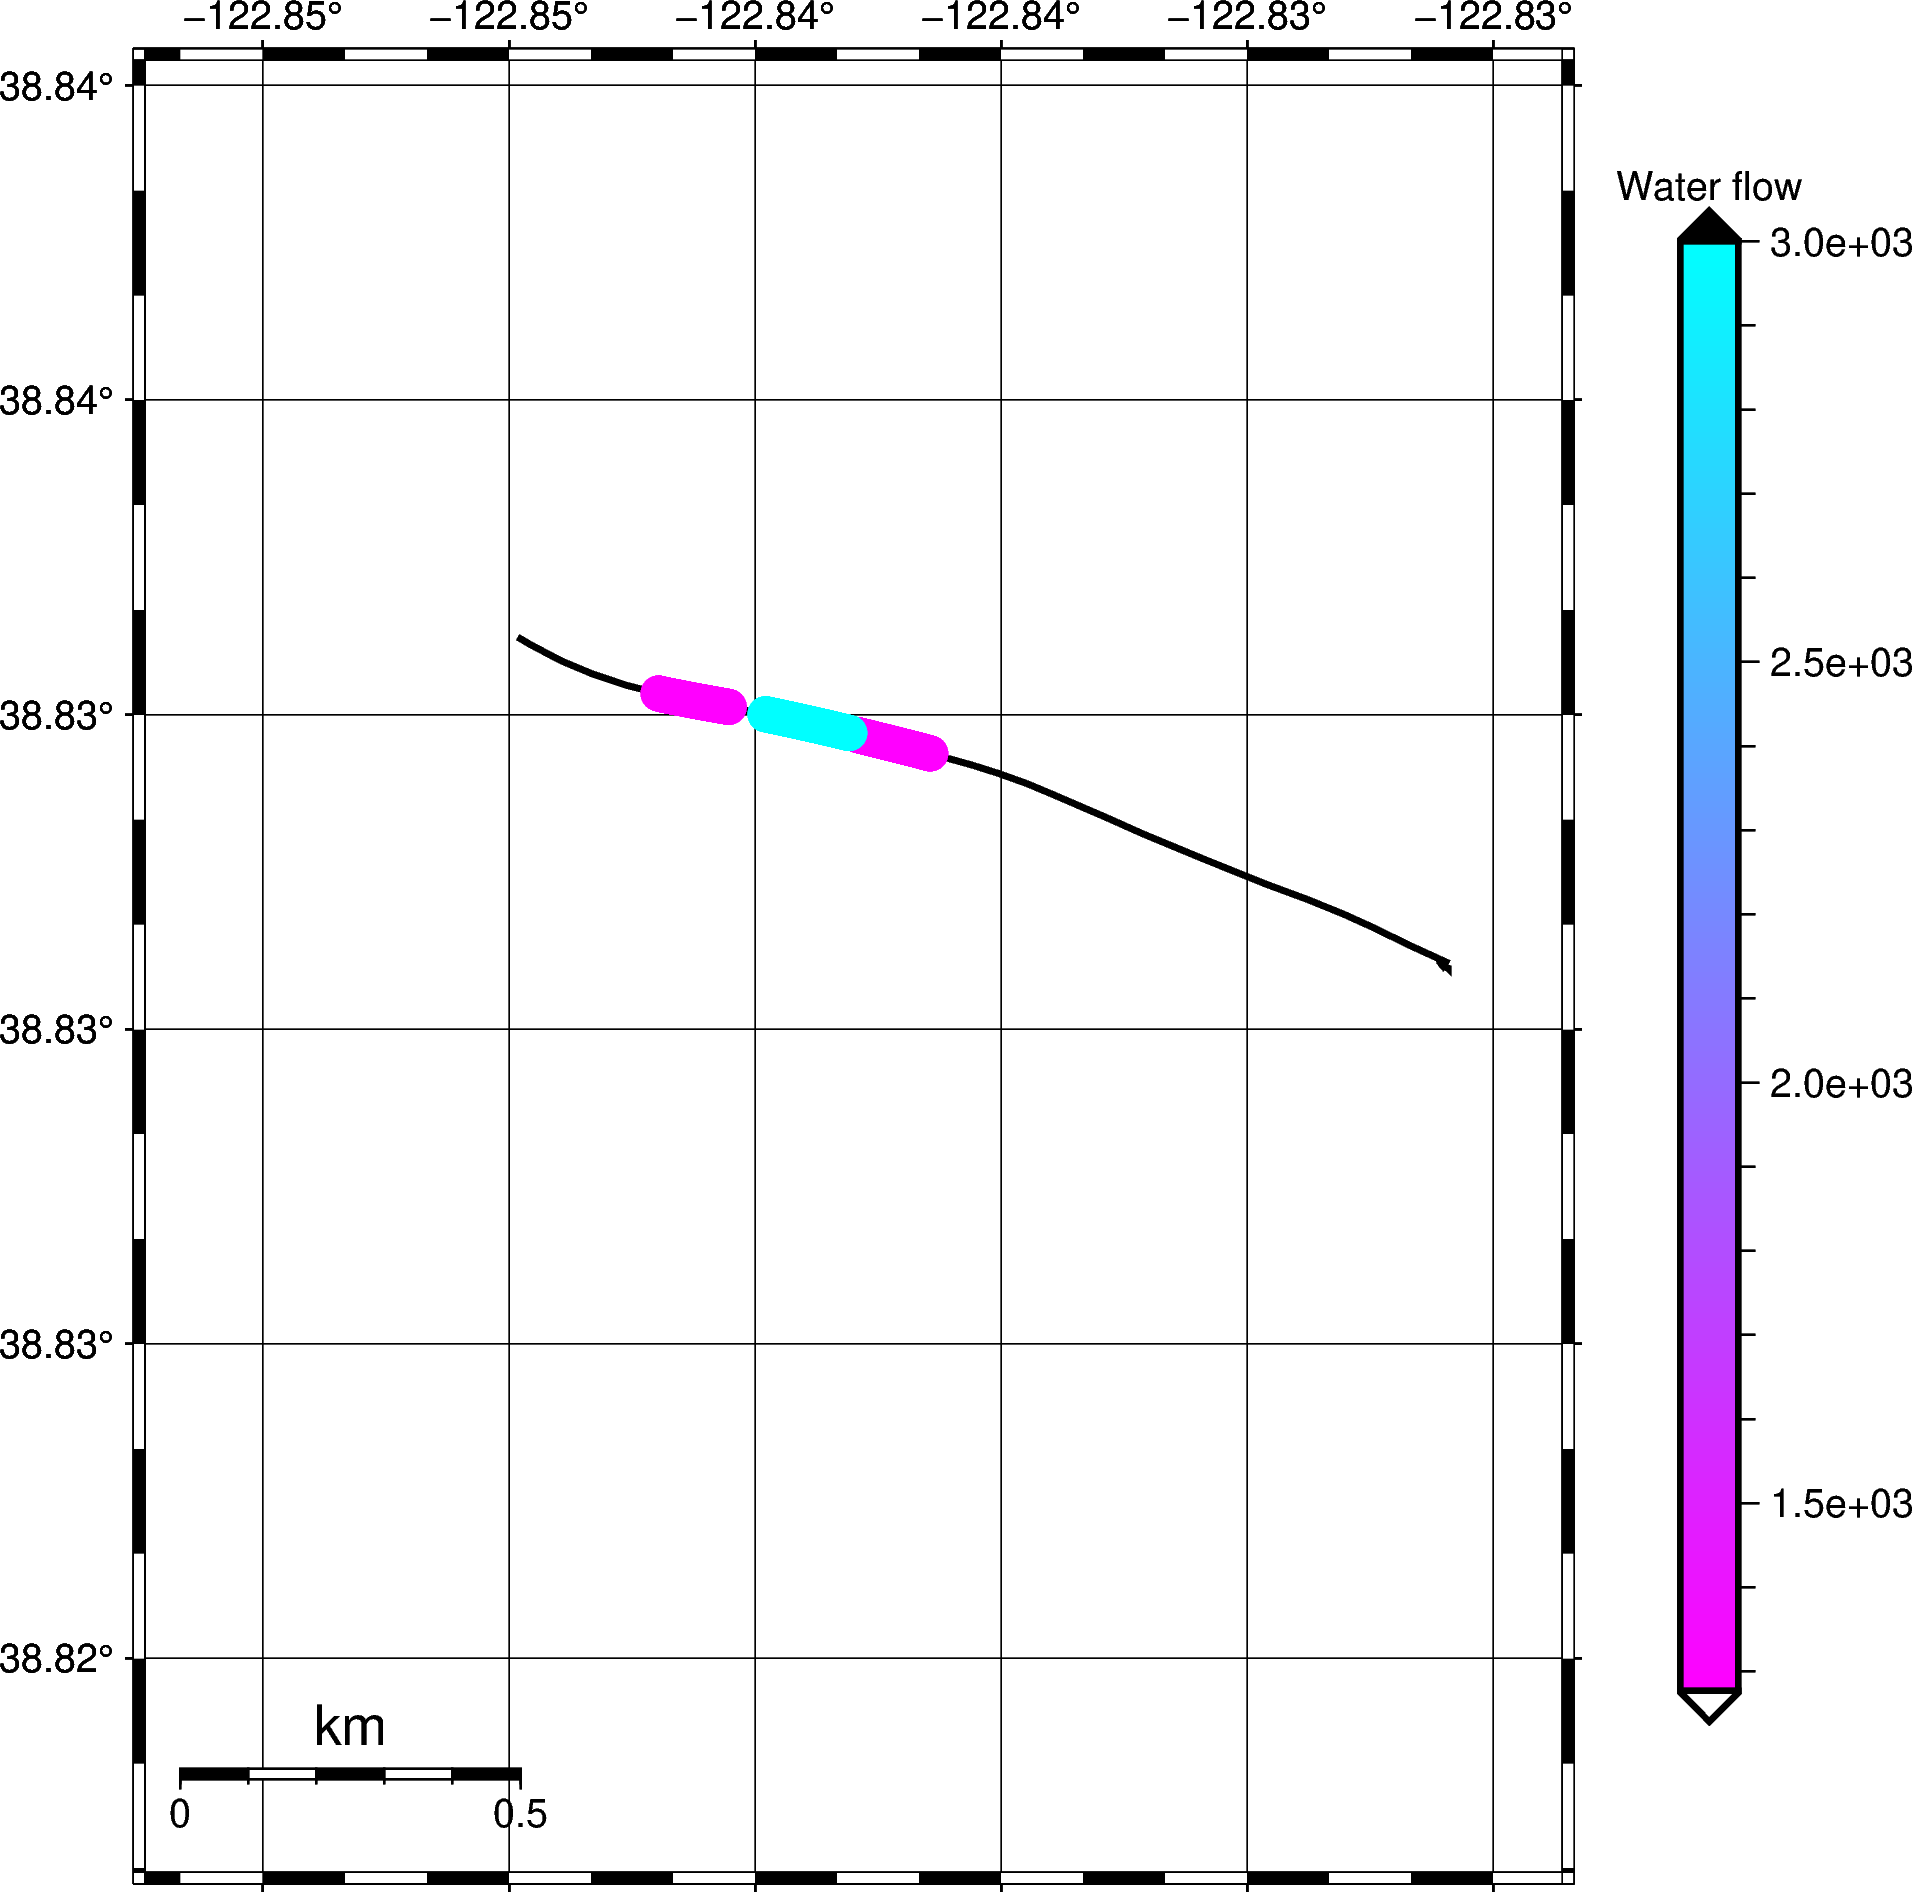

In [22]:
inj_baseplot=BasePlot(color="blue",
                    style="c0.3c",
                    pen=None,
                    cmap=True)

well_baseplot = BasePlot(color = None,
                    style=None,
                    cmap = False,
                    pen = "1.5p,black",
                    label="well_survey")
                    
inj = Injection(data=inj_df,depth_type="TVD",
                    baseplot=inj_baseplot)

inj_cpt = CPT(color_target="measurement",
                label="Water flow",
                cmap="cool",
                series=[inj.data.measurement.min(),
                        inj.data.measurement.max()],
                reverse=True,
                overrule_bg=True)

well_with_inj = Well(data=df,name="well_1",baseplot=well_baseplot,injection=inj)
fig = well_with_inj.plot_map(injection_cpt=inj_cpt,show_injection_cpt=True)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{0.5}k+f+lkm+at")
fig.show()

# MultiWell

MulWell refers to multiple Well objects. It receives a list of Well objects and inheridate every method.

We are going to save some **synthetic wells** saved in the [survey folder](https://github.com/ecastillot/EQViewer/tree/master/data/wells/survey)

In [23]:
import glob
from EQViewer import MulWell

survey_path = os.path.join(rep_data,"wells","survey")

well_baseplot = BasePlot(color = None,
                    style=None,
                    cmap = False,
                    pen = "1.5p,black",
                    label="well_survey")
inj_baseplot=BasePlot(color="blue",
                    style="c0.3c",
                    pen=None,
                    cmap=True)
inj = Injection(data=inj_df,depth_type="TVD",
                    baseplot=inj_baseplot)

wells = []
for path in glob.glob(os.path.join(survey_path,"*")):
    df = pd.read_csv(path)
    wellname = os.path.basename(path).split(".")[0]
    well_with_inj = Well(data=df,name=wellname,
                        baseplot=well_baseplot,injection=inj)
    wells.append(well_with_inj)

wells

In [24]:
inj_cpt = CPT(color_target="measurement",
                label="Water flow",
                cmap="cool",
                series=[inj.data.measurement.min(),
                        inj.data.measurement.max()],
                reverse=True,
                overrule_bg=True)
mulwell = MulWell(wells,injection_cpt=inj_cpt,show_injection_cpt=True)
mulwell

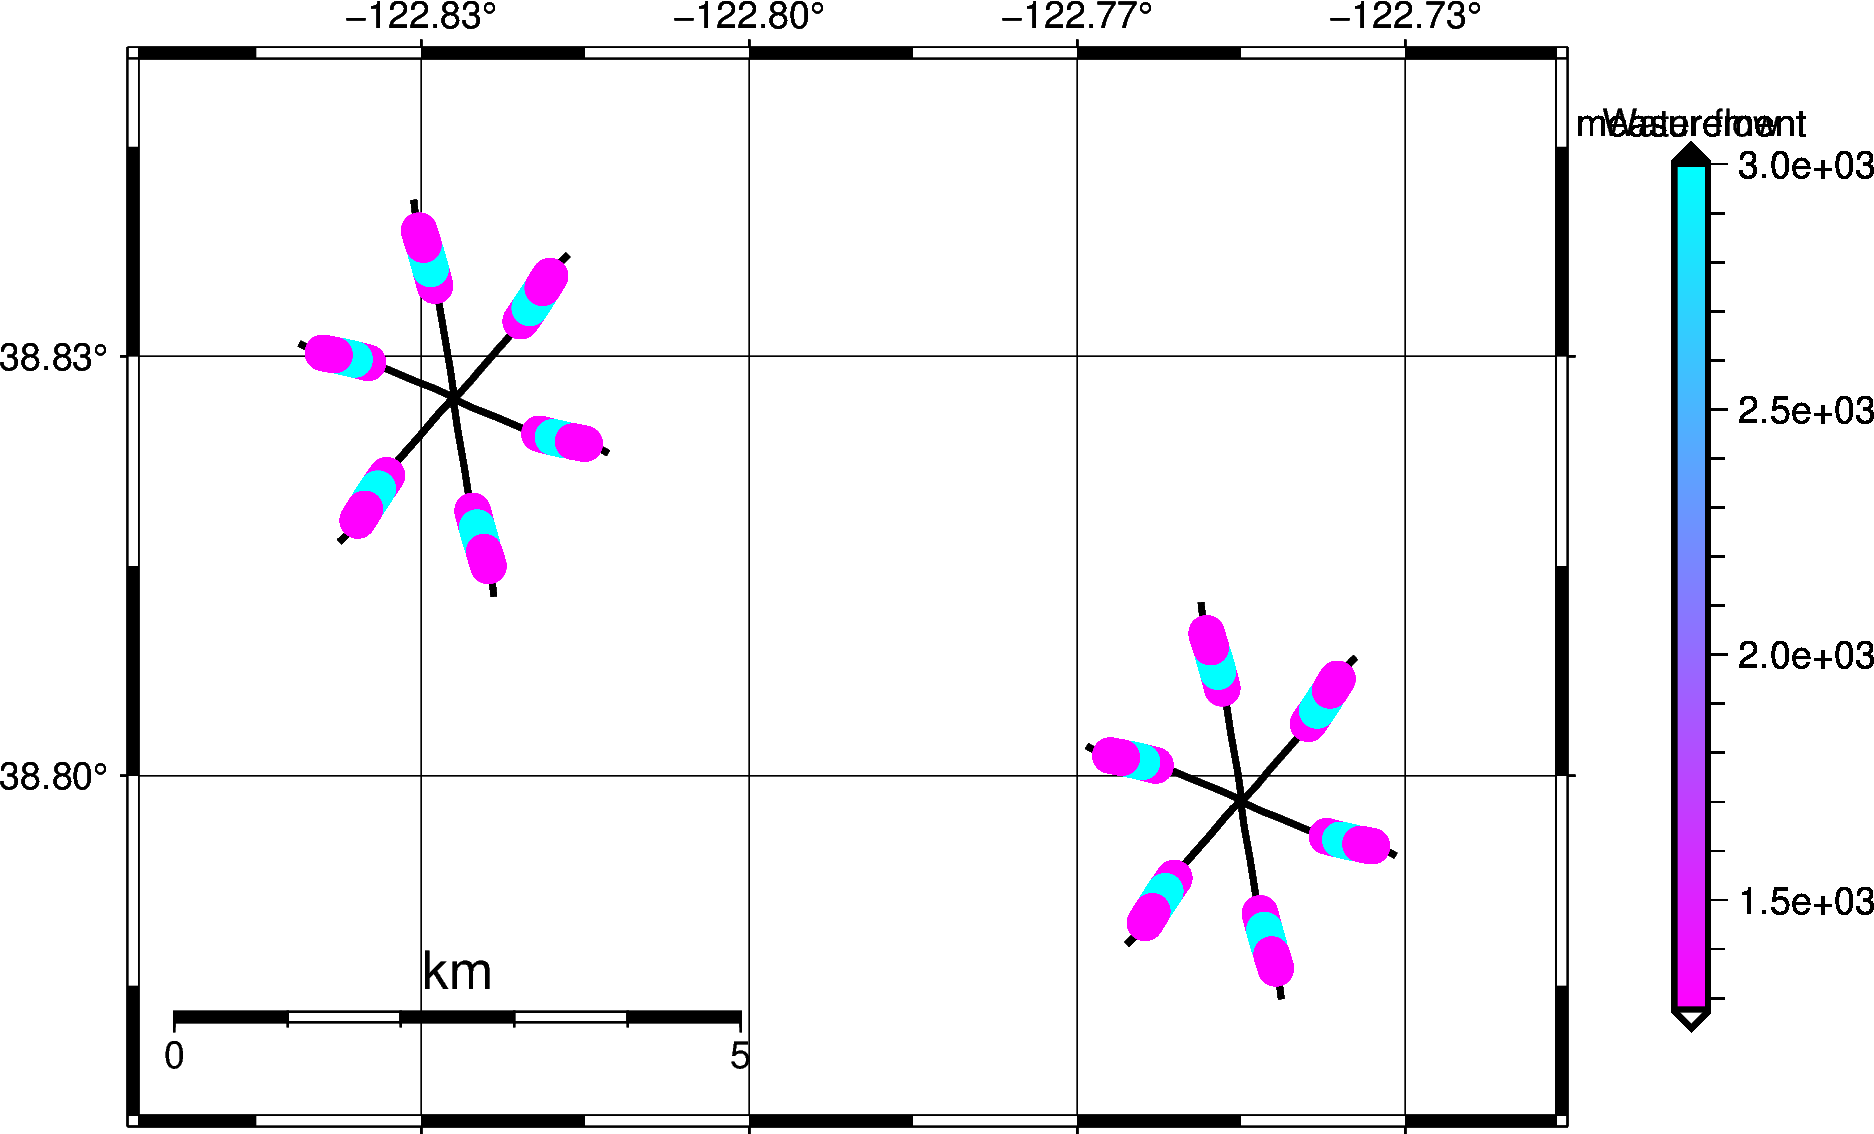

In [25]:
fig = mulwell.plot_map()
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.show()

Or you can plot it in a high resolution map. 

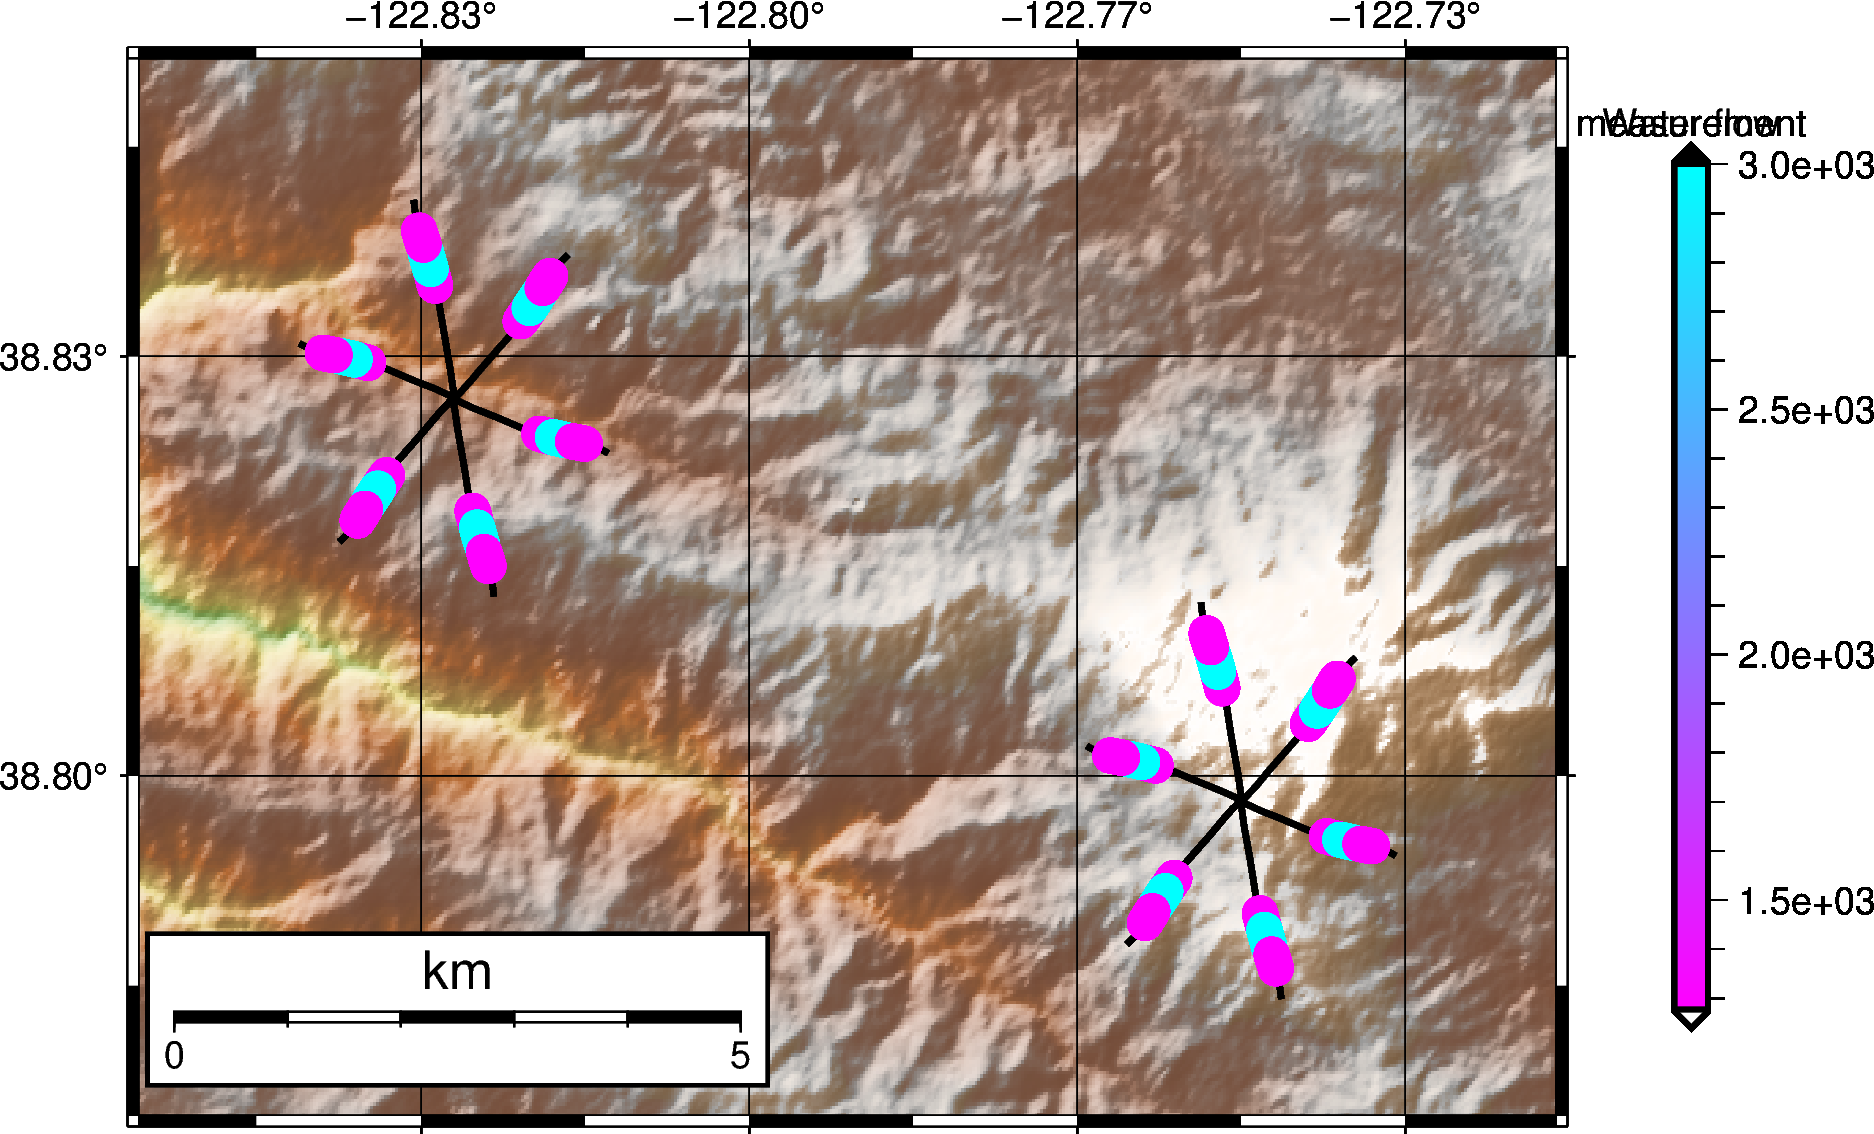

In [26]:
import pygmt

mulwell_region = mulwell.get_region(padding=0.1)

fig = pygmt.Figure() 
fig.basemap(region=mulwell_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01s', #01m resolution 
            cmap=True,
            shading=True,
            transparency=20,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = mulwell.plot_map(fig)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at",box='+gwhite+p1p')
fig.show()